# Исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах

Для анализа предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
<br>

**Задачи:** 
- определить рыночную стоимость объектов недвижимости
- установить параметры объектов недвижимости с целью выявления аномалий
- установить фактороы влияния на общую стоимость объекта.
<br>

**Ход исследования**:
- предисследовательский анализ (обработка пропусков, дубликатов, типов данных, построение новых столбцов и т.п.);
- исследовательский анализ данных (опеределение стоимости объекта недвижимости, средних параметров (плоащадь квартиры, кухни и т.п.), опеределение времени продаж квартир, выявление факторов влияния на общую стоимость объекта и т.д.);
- формулирование общих выводов.


### Общая информация по данным

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

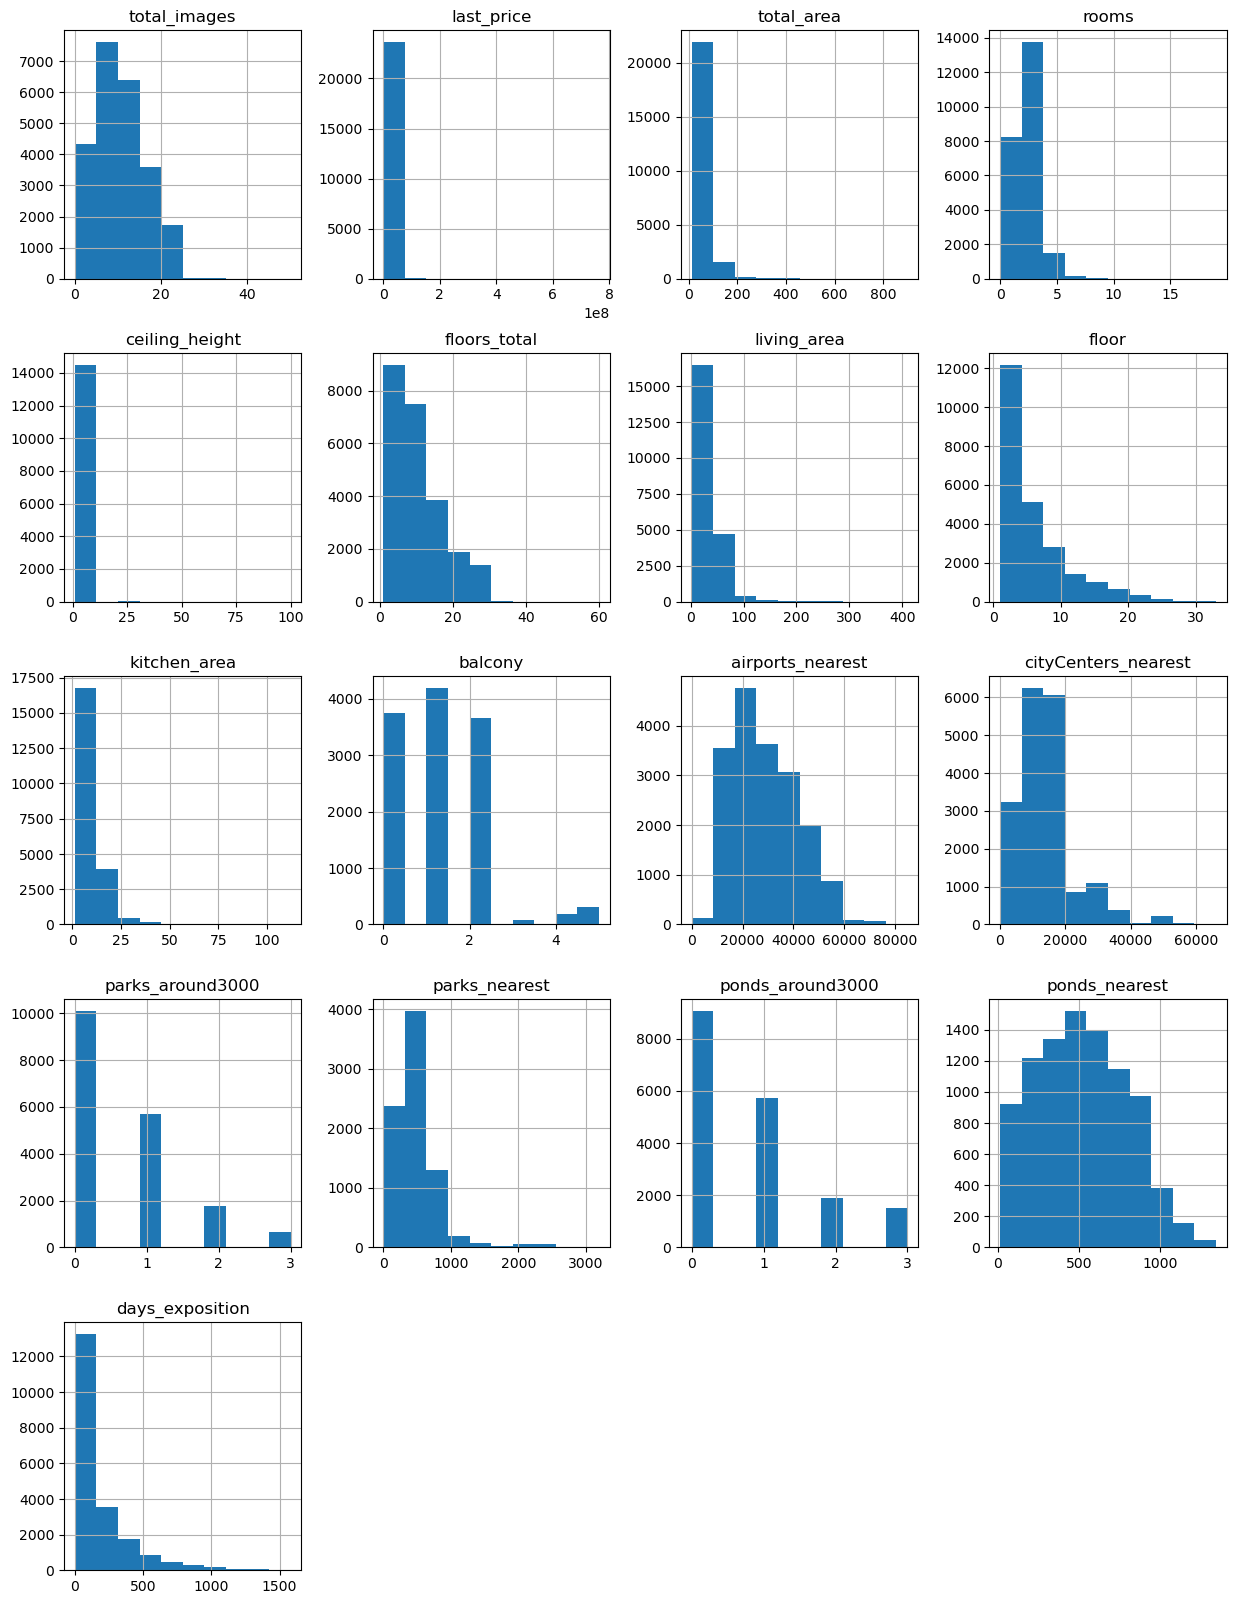

In [35]:
import pandas as pd

try:
    path='/Users/Рафаэль/Desktop/Общий архив/product_analist/'
    estate = pd.read_csv(path+'real_estate_data.csv', sep='\t')
except:
    estate = pd.read_csv('/datasets/real_estate_data.csv')
# Для общего анализа данных были применены методы 'info()' и 'hist()'
estate.info()
estate.head(5)
estate.hist(figsize=(15,20));

Общий анализ данных показал, что в базе данных 22 колонки и 23699 строк. В датафрейме представлены следующие типы переменных: логические (2), дробные числа (14), целые числа (3), строковые (3).

### Предобработка данных

In [36]:
#Для выявления и подсчета пропущенных значений я применила метод isna() и sum().
print(estate.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


С помощью метода `isna` я выявила 14 столбцов с пропущенными значениями (ceiling_height (высота потолков), floors_total(всего этажей в доме), living_area (жилая площадь в кв.метрах) и др.

#### Пропуски по высоте потолков

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
0
0    2.700000
1    2.771499
2    2.771499
3    2.771499
4    3.030000
5    2.771499
6    2.771499
7    2.771499
8    2.771499
9    2.500000
Name: ceiling_height, dtype: float64


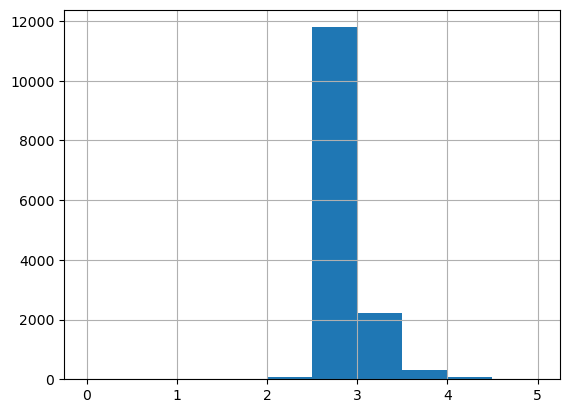

In [37]:
# Я посмотрела с помощью describe общую характеристику распределения данных и заменила пропущенные занчения средним с помощью 
# fiilna(),далее проверила выполнилась ли операция (isna(), sum(), head()).
print(estate['ceiling_height'].describe())
estate['ceiling_height'].hist(range=(0,5),bins=10);
estate['ceiling_height'] = estate['ceiling_height'].fillna(estate['ceiling_height'].mean())
print(estate['ceiling_height'].isna().sum())
print(estate['ceiling_height'].head(10))

В столбце 'ceiling_height' много пропусков (порядка 39%), поэтому замена пропусков может повлечь серьезное изменение данных. Тем не менее, стандартное отклонение небольшое и медиана и среднее очень похожи, также построение гистограммы со срезом от 0 до 5 метров, показал, что большая часть данных группируются в промежутке 2,5 - 3 метра, значит, возможно заполнение пропусков средним  значением. Отсутствие значений в столбце с высотой потолков может быть связана со второстепенностью данного параметра покупки квартир, а также с наличием стандартов высоты потолков СНиПа.

#### Пропуски по общему количеству этажей в доме иназваниям населенного пункта

In [38]:
print(estate['floors_total'].describe())

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


 В данном столбце очень мало пропусков (менее 1%), поэтому можно не заполнять пропуски. Кроме того, данное действие нежелательно, так как некорректное заполнение данного столбца, может сильно исказить описание недвижимости, так, к примеру, если в доме 1-2 этажа (скорее всего это частный дом), и мы его заполним средним (примерно 11 этажей), тогда он перестанет быть частным и станет многоквартирным зданием. Пропуски в этом столбце, вероятно, связаны и с второстепенностью данного параметра, так и нежеланием указания общего количества этажей в очень высоких домах, поскольку некоторым покупателям не нравится жить в большом "муравейнике".     
 <br>
Пропуски в столбце с названиями населенного пункта также не будем заполнять, так как у нас нет такой информации, и в целом, пропусков всего 49. Пропуски в данном столбце могут быть связаны не с человеческим фактором (из-за невнимательности заполняющего, к примеру).

#### Пропуски в столбце "апартаменты"

In [39]:
# я заполню пропуски - False - с помощью fillna далее проверила выполнилась ли операция (isna(), sum(), head()).
estate['is_apartment'] = estate['is_apartment'].fillna('False')
print(estate['is_apartment'].isna().sum())
print(estate['is_apartment'].head())

0
0    False
1    False
2    False
3    False
4    False
Name: is_apartment, dtype: object


В данном столбце значения представлены - False и True, что означает, является ли квартира апартаментами. Пропуски скорее всего связаны с тем, что квартира не апартаменты, поэтому можно заполнить их с помощью False.

#### Пропущенные значения в столбце "жилая площадь"

In [40]:
# я решила вывести медиану жилой площади по числу комнат, для этого использовала pivot_table (но потом использовала groupby для
# подстановки в fillna, так как программа не принимает код с pivot_table. После этого заполняю пропущенные значения 
# медианой по числу комнат.
print(estate['living_area'].head(5))
living_area_median = estate.pivot_table(index='rooms',values='living_area', aggfunc='median')
print(living_area_median)
print()
estate['living_area'] = estate['living_area'].fillna(estate.groupby('rooms')['living_area'].transform('median'))
print(estate['living_area'].head(5))  
print(estate['living_area'].isna().sum())

0    51.0
1    18.6
2    34.3
3     NaN
4    32.0
Name: living_area, dtype: float64
       living_area
rooms             
0           18.000
1           17.600
2           30.500
3           45.000
4           63.600
5           91.785
6          123.900
7          145.000
8          161.000
9          179.200
10         161.400
11         133.900
12         409.700
14         195.150
15         409.000
16         180.000
19         264.500

0    51.0
1    18.6
2    34.3
3    45.0
4    32.0
Name: living_area, dtype: float64
0


Пропуски в столбце с жилой площадью я заменила медианными значениями по числу комнат, поскольку, площадь квартиры, как правило, связана с числом комнат (чем больше комнат, тем больше площадь). Отсутствие данных по этому параметру, вероятно, связано с тем, что указана общая площадь (в столбце с общей площадью нет пропущенных значений), как основная характеристика плозади квартиры. А  более детальная информация о площади квартиры с указанием жилой площади, может быть не выигрышным моментом объявления, если, к примеру, квартира имеет достаточно большую общую площадь и маленькую жилую площадь.

#### Пропущенные значения в столбцах "количество балконов", "расстояние до центра города в метрах", "расстояние до ближайшего аэропорта", "расстояние до ближайшего парка", "число водоемов  в радиусе 3 км", "расстояние до ближайшего водоема"

In [41]:
# Я заполнила пропуски в столбце balcony нулевыми значениями с помощью метода fillna и проверила его действие с помощью isna(), 
# sum(), head().
estate['balcony'] = estate['balcony'].fillna('0')
print(estate['balcony'].isna().sum())
print(estate['balcony'].head(10))

0
0      0
1    2.0
2    0.0
3    0.0
4      0
5      0
6    1.0
7    2.0
8      0
9    2.0
Name: balcony, dtype: object


В столбце с количеством балконов пропуски можно заполнить нулевым значением, так как пропуски скорее всего связаны с отсутствием балконов.
<br>

Пропуски в столбцах с расстоянием до центра города, ближайшего парка, числом водоемов и т.п. лучше не заполнять, так как они являются не очень важными параметрами при покупке квартиры, и их заполнить корректными значениями не получится. 

#### Пропущенные значения в столбце "площадь кухни"

In [42]:
# я решила вывести медиану площади кухни по числу комнат, для этого использовала pivot_table (но потом использовала groupby для
# подстановки в fillna, так как программа не принимает код с pivot_table. После этого заполняю пропущенные значения 
# медианой по числу комнат.
print(estate['kitchen_area'].head(5))
area_kitchen_median = estate.pivot_table(index='rooms',values='kitchen_area', aggfunc='median')
print(area_kitchen_median)
print()
estate['kitchen_area'] = estate['kitchen_area'].fillna(estate.groupby('rooms')['kitchen_area'].transform('median'))
print(estate['kitchen_area'].head(5))  
print(estate['living_area'].isna().sum())

0    25.0
1    11.0
2     8.3
3     NaN
4    41.0
Name: kitchen_area, dtype: float64
       kitchen_area
rooms              
1              9.04
2              8.80
3              9.50
4             11.10
5             15.10
6             19.50
7             20.00
8             25.00
9             14.30
10            19.80
11            12.60
12           112.00
14            21.25
15           100.00
16            13.00
19            27.60

0    25.0
1    11.0
2     8.3
3     9.5
4    41.0
Name: kitchen_area, dtype: float64
0


Пропуски в столбце с площадью кухни я заменила медианными значениями площади кухни по числу комнат. Пропущенные значения могут быть связаны с наличием малой площади кухнии и, следовательно, с нежеланием продавца показывать невыигрышный параметр квартиры. Также данные пропуски, вероятно, связаны с тем, что во всех объявлениях уже есть указание общей площади, и для более детальной информации предполагается непосредственное обращение к продавцу.

#### Пропущенные значения в столбце "сколько дней было размещено объявление"

В данном столбце пропуски стоит оставить, так как нет возможности заменить их корректными значениями.

#### Типы данных в столбцах

In [43]:
# тип данных в столбце first_day_exposition я переделываю в тип данных 'datetime' с помощю метода to_datetime.
print(estate['first_day_exposition'])
estate['first_day_exposition'] = pd.to_datetime(
    estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
  )
print(estate['first_day_exposition'])
print()
# тип данных в столбце is_apartment меняю с помощью astype('bool') в тип данных bool.
print(estate['is_apartment'])
estate['is_apartment'] = estate['is_apartment'].astype('bool')
print(estate['is_apartment'])
print()
# тип данных в столбце balcony меняю с помощью astype('int') в тип данных int.
print(estate['balcony'])
estate['balcony'] = estate['balcony'].astype('int')
print(estate['balcony'])

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object
0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: object
0        True
1        True
2        True
3        True
4        True
         ... 
23694    True
23695    True
23696    True
23697    

В столбце с датой публикации стоит тип данных - "строка" (object), поэтому необходимо поменять тип данных на "дату" (datetime).
<br>

В столбце с количеством этажей - тип данных "вещественное число", которое необходимо поменять с помощью astype('int') в целое число, но из-за наличия пропущенных значений, это невозможно (мы решили оставить эти пропуски), потому мы не меняем тип данных.
<br>

В столбце с указанием апартаментов тип данных представлен типом данных "строка", необходимо поменять его на булевой тип данных, так как значения в столбце булевые (True, False). 
<br>

В столбце с наличием балконов я менияю тип данных на "целое число".


In [44]:
estate['last_price'] = estate['last_price'].astype('int')
print(estate['last_price'])

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int32


#### Устранение неявных дубликатов

In [45]:
# В столбце locality_name мы сначала выявили все уникальные значения с помощью unique(), потом методом str.replace 
# поменяли "поселок" на "посёлок", еще раз применили на изменный столбец str.replace , заменив "городской поселок" на
# "посёлок городского типа".
print(estate['locality_name'].unique())
estate['locality_name'] = estate['locality_name'].str.replace('поселок','посёлок ') 
estate['locality_name'] = estate['locality_name'].str.replace('городской посёлок','посёлок городского типа') 

print(estate['locality_name'].unique())


['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

В данном столбце много неявных дубликатов, связанных со словом "посёлок", оно имеет несколько вариций - "поселок"/"посёлок", "поселок городского типа"/"посёлок городского типа", "городской поселок"/"городской посёлок". По этой причине для устранения большинства дубликатов мы поменяли все слова "поселок" на "посёлок" (с буквой "ё"), а также унифицировали "городские посёлки" с "посёлками городского типа".

#### Анализ аномальных значений в столбцах

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
total_images            1
last_price              1
total_area              1
first_day_exposition    1
rooms                   1
ceiling_height          1
floors_total            1
living_area             1
floor                   1
is_apartment            1
studio                  1
open_plan               1
kitchen_area            1
balcony                 1
locality_name           1
airports_nearest        1
cityCenters_nearest     1
parks_around3000        1
parks_nearest           0
ponds_around3000        1
ponds_nearest           1
days_exposition         1
dtype: int64
       total_images  last_price  total_area first_day_exposition  rooms  \
19540             8   420000000       900.0           2017-12-06     12   

       ceiling_height  floors_total  living_area  floor

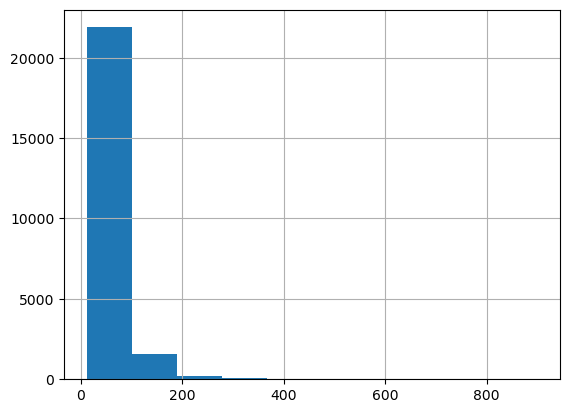

In [46]:
# я для выявления аномалий исползовала describe и hist() и увидела аномальные значения, чтобы узнать их распространенность 
# (помимо гистограммы) использовалат срез и count. Также, чтобы увидеть строку с жилой площадью в 900 кв.м. сделалf срез. Для 
# остальных столбцоd использовала ту же логику и методы.
print(estate ['total_area'].describe())
estate ['total_area'].hist(bins=10);
print(estate[estate['total_area'] == 900].count())
estate_big = estate[estate['total_area']==900]
print(estate_big)
print(estate[estate['total_area'] <= 15].count())
print()
print(estate ['balcony'].describe())
print(estate[estate['balcony'] >= 4].count())
print()
print(estate ['floors_total'].describe())
print(estate[estate['floors_total'] >= 43].count())
estate ['floors_total'].hist(bins=20, range=(42,60));
# count использовала для проверки выполнения среза.
print(estate['floors_total'].count())
print()
print(estate['ceiling_height'].describe())
print(estate['ceiling_height'].unique())
# просмотр значений с помощью unique показал, что большая часть значений высоты потолков варьируется от 1 до 4 метра и 
# аномальные значения начинаются с 20 метров (их 23 шт) 
print(estate[estate['ceiling_height']>=20].count())
# Применила функцию для строк с высотой потолка больше 25 и меньше 2.4 м.
def ceil(row):
    ceiling_height = row['ceiling_height']
    if ceiling_height >= 20:
        ceiling_height = ceiling_height / 10
        return ceiling_height
    elif ceiling_height < 2.4:
        return 2.4 
    else:
        return ceiling_height
estate['ceiling_height'] = estate.apply(ceil, axis = 1)
print(estate['ceiling_height'].unique()) # для проверки выполнения функции применила unique() и describe()
print(estate['ceiling_height'].describe())


Аномальные значения были выявлены в следующих столбцах: высота потолков, количество этажей, общая площадь, число балконов. 
<br>

В общей площади выбивающимися значениями, на первый взгляд, можно назвать недвижимость с площадью 12 кв.м и 900 кв.м. Я решила не удалять эти выбивающиеся значения, так как недвижимость с площадью меньше 15 кв.м могут быть студиями или комнатами (кроме того, их немного 8 шт), а недвижимость со слишком большой площадью может быть целым поместьем (эту гипотезу подтверждает тот факт, что жилая площадь в этой недвижимости 409,7, т.е. все остальное территория), которое попало случайно в данную базу данных.
<br>

Сходная ситуация с балконами, встречаются квартиры с 4 и 5 балконами (487 недвижимостей, порядка 2%), однако я их тоже оставила, так как такое может встречаться.
<br>

В столбце с высотой потолков встречаются аномальные значения - как слишком высокие, так и слишком низкие потолки по нормативам, согласно которым высота потолков не должна быть менее 2.4 м. и не более 6 м. в пентхаусах. Для устранения выбивающихся значений я выбрала этажи выше 20 м., их 23 шт, хотя есть и одна недвижимость с 14 м, несколько с 10 и 8 м., но я буду брать в качестве аномальных именно те, которые выше 20 м., чтобы была возможность поделить их на 10 и получить более менее нормативную высоту. Я делю на 10 согласно гипотезе о том, что аномальные значения связаны с опечаткой, а именно отсутсвием знака для деления числа, к примеру, вместо 24 м, должно быть 2.4 м. Также все потолки ниже норматива (2.4 м) я приравняла к этой цифре. Таким образом, размах значений уменьшился, минимальное значение стало равно 2 (было 1), максимальное - 14 (было 100) и уменьшилось стандартное отклонение.
<br>

В столбце с количеством этажей есть два выбивающихся значения, т.е. значений выше 42, так как в Санкт-Петербурге самое высотное здание на сегодняшний день имеет всего 42 этажа. Таких высоток - 2 (52 и 60 этажей), я их удалила.

In [47]:
print(estate.duplicated().sum())

0


### Новые столбцы в таблице

#### Цена одного квадрата

In [48]:
# Делю цену на момент снятия публикации на общую площадь недвижимости и для удобства просмотра приведем к целому числу, 
# проверим результат с помощью head().
estate['meter_price'] = (estate['last_price'] / estate['total_area']).astype('int')
print(estate['meter_price'].head(10))

0    120370
1     82920
2     92785
3    408176
4    100000
5     95065
6     99195
7    110544
8     87454
9     88524
Name: meter_price, dtype: int32


#### Таблица день недели публикации объявления

In [49]:
# Создаю столбец дня недели с помощью dt.weekday
estate['weekday_exposition'] = estate['first_day_exposition'].dt.weekday
print(estate['weekday_exposition'].head(10))

0    3
1    1
2    3
3    4
4    1
5    0
6    3
7    3
8    2
9    6
Name: weekday_exposition, dtype: int64


#### Таблица - месяц публикации объявления

In [50]:
# Создаю столбец месяца с помощью dt.month
estate['month_exposition'] = estate['first_day_exposition'].astype('datetime64[M]')
print(estate['month_exposition'].head(10))

0   2019-03-01
1   2018-12-01
2   2015-08-01
3   2015-07-01
4   2018-06-01
5   2018-09-01
6   2017-11-01
7   2019-04-01
8   2018-05-01
9   2017-02-01
Name: month_exposition, dtype: datetime64[ns]


#### Таблица - год публикации объявления

In [51]:
# Создаю столбец года с помощью dt.year
estate['year_exposition'] = estate['first_day_exposition'].dt.year
print(estate['year_exposition'].head(10))

0    2019
1    2018
2    2015
3    2015
4    2018
5    2018
6    2017
7    2019
8    2018
9    2017
Name: year_exposition, dtype: int64


#### Таблица - тип этажа квартиры

In [52]:
# Создаю функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
estate['floor_category'] = estate.apply(floor_category, axis = 1)
print(estate['floor_category'].head(10))

0    другой
1    первый
2    другой
3    другой
4    другой
5    другой
6    другой
7    другой
8    другой
9    другой
Name: floor_category, dtype: object


#### Таблица - расстояние до центра города в километрах

In [53]:
# делим расстояние до центрах на 1000, чтобы перевести метры в километры, а также с помощью round() округлила получившиеся
# значения и проверяю результат методом head() до и после.
print(estate['cityCenters_nearest'].head(10))
estate['city_distance'] = (estate['cityCenters_nearest']/1000).round()
print(estate['city_distance'].head(10))

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
5        NaN
6    19143.0
7    11634.0
8        NaN
9    15008.0
Name: cityCenters_nearest, dtype: float64
0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
5     NaN
6    19.0
7    12.0
8     NaN
9    15.0
Name: city_distance, dtype: float64


### Исследовательский анализ данных

#### Анализ параметров объектов

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

count    23699.000000
mean        34.321982
std         21.700627
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

count    23502.000000
mean        10.464501
std          5.664289
min          1.300000
25%          7.300000
50%          9.040000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.00

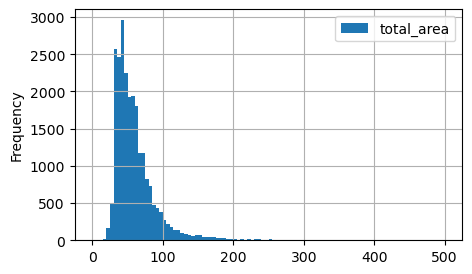

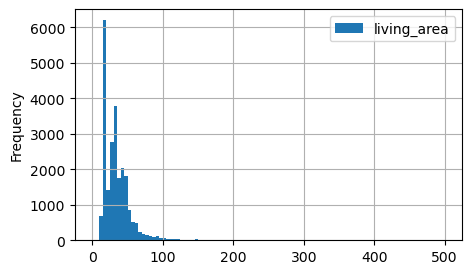

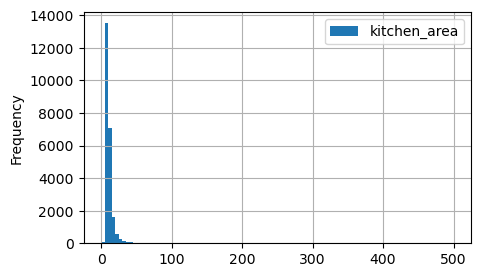

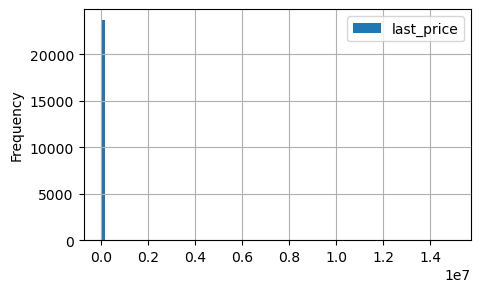

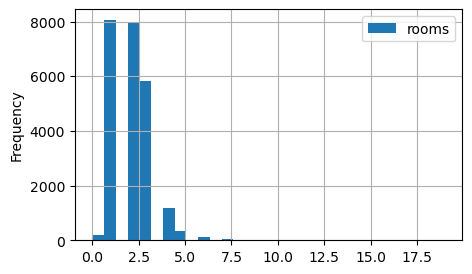

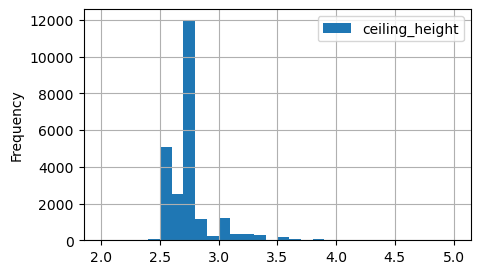

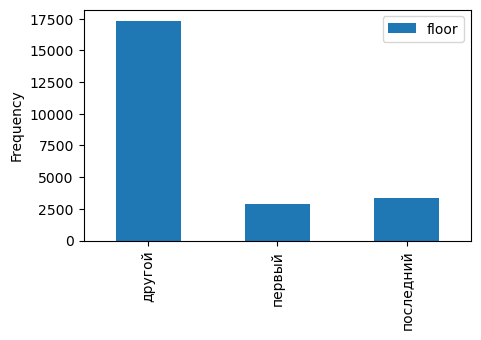

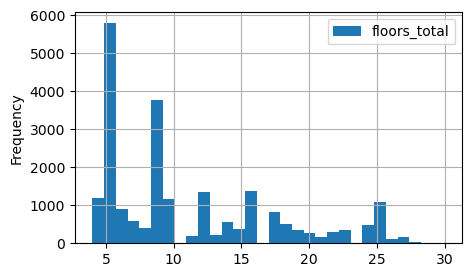

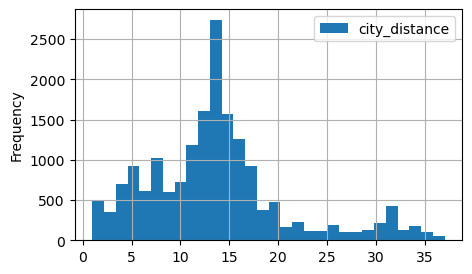

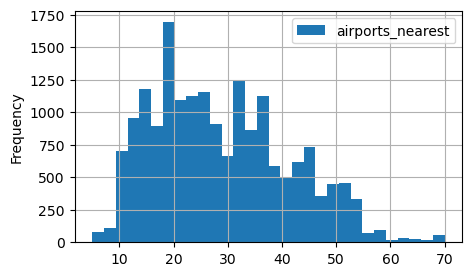

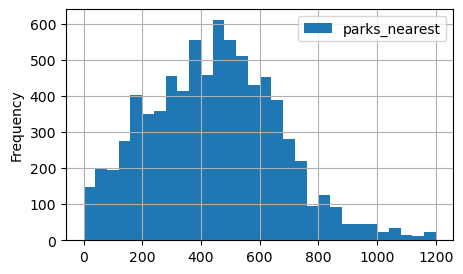

In [54]:
# Строю гистограмму для изучения заданных параметров с помощью plot(), чтобы иметь возможность указать различные 
# характеристики графика (размер, наличие решетки и т.д.), также методом describe() смотрю общую характеристику распределения

# Строю гистограмму для изучения общей площади
estate.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(5,3), range=(0,500))
print(estate['total_area'].describe())
print()

# Строю гистограмму для изучения жилой площади
estate.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(5,3), range=(0,500))
print(estate['living_area'].describe())
print()

# Строю гистограмму для изучения площади кухни
estate.plot(y ='kitchen_area', kind='hist', bins=100, grid=True, figsize=(5,3), range=(0,500))
print(estate['kitchen_area'].describe())
print()

# Строю гистограмму для изучению цены объекта 
# estate['last_price'] = estate['last_price']/1000000
estate['last_price']= estate['last_price']/1000
estate.plot(y ='last_price', kind='hist', bins=100, grid=True, range =(0,15000000), figsize=(5,3))
print(estate['last_price'].describe())
print()

# Строю гистограмму для изучения числа комнат
estate.plot(y='rooms', kind='hist', bins=30, grid=True, figsize=(5,3))
print(estate['rooms'].describe())
print()

# Строю гистограмму для изучения высоты потолков
estate.plot(y='ceiling_height', kind='hist', bins=30, range=(2,5), grid=True, figsize=(5,3))
print(estate['ceiling_height'].describe())
print()

# Строю гистограмму для изучения этажа квартиры
estate.plot(y='floor', kind='hist', bins=30, range=(4,30), grid=True, figsize=(5,3))
print(estate['floor'].describe())
print()

# Строю гистограмму для изучения типа этажа квартиры подсчетом значений и их сортировкой, т.к. тип данных не количественный
estate['floor_category'].value_counts().sort_index(ascending=True).plot.bar()
print()

# Строю гистограмму для изучения общего количества этажей в доме
estate.plot(y='floors_total', kind='hist', bins=30, range=(4,30), grid=True, figsize=(5,3))
print()

# Строю гистограмму для изучения расстояния до центра города
estate.plot(y='city_distance', kind='hist', bins=30, range=(1,37), grid=True, figsize=(5,3))
print(estate['city_distance'].describe())
print()

# Строю гистограмму для изучения расстояния до ближайшего аэропорта, но сначала переведем метры в километры для наглядности, окргулим.
estate['airports_nearest'] = (estate['airports_nearest']/1000).round()
estate.plot(y='airports_nearest', kind='hist', bins=30, range=(5,70), grid=True, figsize=(5,3))
print(estate['airports_nearest'].describe())
print()

# Строю гистограмму для изучения ближайшего парка, предварительно округлив цифры, переводить м. в км. не стоит, т.к. расстояние не большое.
estate['parks_nearest'] = estate['parks_nearest'].round()
estate.plot(y='parks_nearest', kind='hist', bins=30, range=(0,1200), grid=True, figsize=(5,3))
print(estate['parks_nearest'].describe())
print()

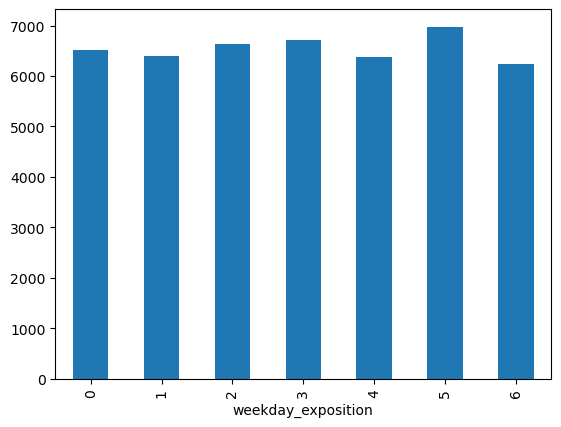

In [55]:
# Строю гистограмму для изучения дня и месяца публикации объявления, для этого группирую эти столбцы со столбцом с ценой и нахожу 
# среднее (строю в отдельном поле, т.к. в предыдущем поле программа не строит эти графики почему-то)
estate.groupby('weekday_exposition')['last_price'].mean().plot.bar();

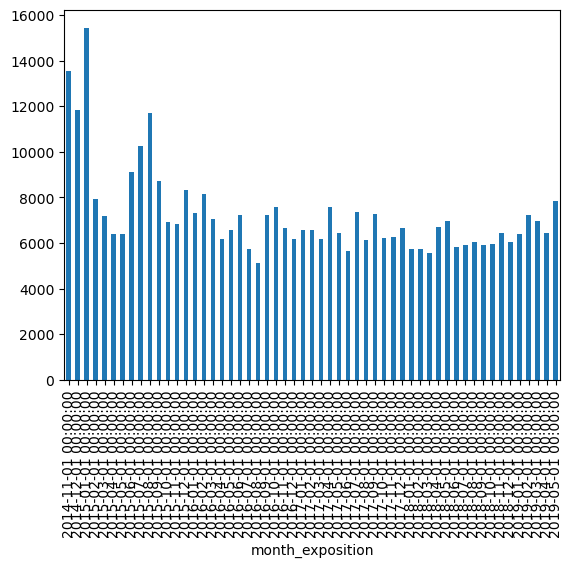

In [56]:
estate.groupby('month_exposition')['last_price'].mean().plot.bar();

По *общей площади* распределение данных похоже на нормальное, есть выбросы, но они не сильно влияют на данные. Большая часть объектов имеет площадь примерно от 30 до 80 кв. метров. Общая площадь в нашей выборке колеблется от 12 до 900 кв.м, есть выбросы, сильно превышающие средние значения (среднее значение 60, а медиана 52). 
<br>

По *жилой площади* также распределение похоже на нормальное, есть выбросы, сильно превышающие средние значения (среднее 34, медиана 30). В целом большая часть значнений сосредоточена в диаразоне 10-80 кв.м.
<br>

По *площади кухни* также распределение похоже на распределение Гаусса, выбросов не много, среднее и медиана очень похожи (9 и 10, сооответственно), что говорит об однородности значений. В целом большая часть значнений сосредоточена в диапазоне 10-25 кв.м.
<br>

По *цене* - распределение нормальное, большая часть квартир имеет цену от 3 до 6 млн. рублей, есть выбросы,  среднее и медиана равны 6,5 и 4,6 млн. рублей.
<br>

По *числу комнат* - распределение нормальное, выбросов не много, среднее и медиана - 2, в целом число комнат в квартире варьируется от 0 (скорее всего это студии) до 19, вместе с тем, больше всего однокомнатных и двухкомнатных квартир. 
<br>

По *высоте потолков* - большая часть квартир имеет высоту в 2,7 м, что совпадает со средней и медианой, в распределении значений есть выбросы, высота потолков вариьируется от 2 до 14 м. 
<br>

По *этажу квартиры* - распределение Гаусса, самое большое количество продаваемых объектов находятся на 4 и 5 этажах, в целом же большая часть квартир находится до 10 этажа. В распределение наблюдается следующая взаимосвязь, чем выше этаж, тем меньше продается квартир, что, вероятно, связано, с тем, что в Санкт-Петербурге мало высотных домов (самый высокий этаж в данных - 33). 
<br>

По *типу этажу квартиры* - самое большое количество квартир (около 14 тыс.) имеет не первый и не последний этажи ("другой"). Порядка 3 тыс. объявлений имеют квартиры на первом этаже и примерно 1000 объявлений - на последнем этаже.
<br>

По *количеству этажей в доме* - наблюдается нормальное распределение, самое большое количество этажей в домах  10 этажей, однако домов с 11 и 12, а также 16 и 17 этажами очень мало, вместе с тем, также достаточно большое количество встречается 20-этажек.
<br>

По *расстоянию до центра в км.* - наблюдается нормальное распределение, среднее значенияе и медиана примерно равны 14 и 13 км.,  максимальное расстояние от центра равно 55 км, в целом же большая часть квартир находится недалеко от центра примерно в 11-15 км.
<br>

По *расстоянию до центра в км.* - наблюдается нормальное распределение, среднее значенияе и медиана примерно равны 14 и 13 км.,  максимальное расстояние от центра равно 55 км, в целом же большая часть квартир находится недалеко от центра примерно в 11-15 км.
<br>

По *расстоянию до аэропортов в км.* - наблюдается нормальное распределение, среднее значенияе и медиана равны 29 и 27 км.,  максимальное расстояние равно 85 км, в целом же большая часть квартир находится недалеко от 9 до 55 км. от аэропортов.
<br>

По *расстоянию до парков в м.* - наблюдается нормальное распределение, среднее значение и медиана примерно равны 500 м.,  максимальное расстояние до парков составляет 3 км, вместе с тем, большая часть квартир находится до 1 км. до парков.
<br>

По *продажам по дням недели и месяцам* - наблюдается сходная ситуация, квартиры примерно одинаково продаются во все дни недели и месяца, вместе с тем, можно отметить, что по субботам и в январе чсило продаж несколько выше, чем в остальные дни недели и месяца.

#### Анализ времени продаж квартир

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64


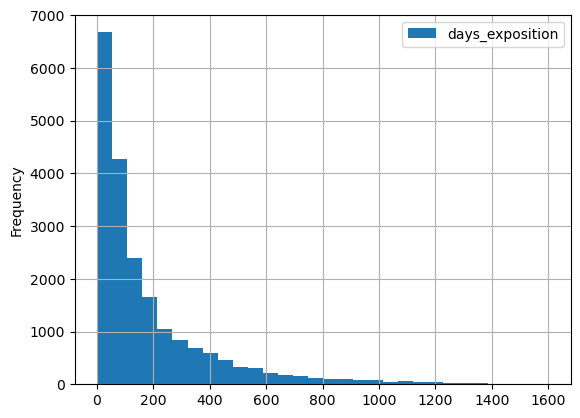

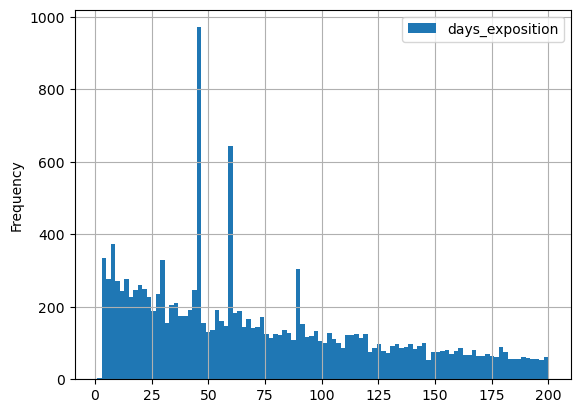

In [57]:
# для нахождения медианы и средний мы использовали describe(), потом построили диаграмму, сначала без среза, потом со срезом,
# увеличив размер диаграммы, чтобы подробнее проанализировать распределение
print(estate['days_exposition'].describe())
estate.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
estate.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

# вторая диаграмма показала выбивающиеся значения, методом value_counts я убедилась, что есть определенные дни с аномальными щначениями
print(estate['days_exposition'].value_counts())


Распределение количества дней размещения объявления представлено распределением Пуассона. Среднее значение - 181 день, а медиана - 95 дней. Анализ гистограммы с увеличенным размером корзин я обнаружила выбивающиеся значения, равные 7, 30, 45, 60, 90. Согласно правилам размещения объявлений в Яндекс Недвижимость, эти числа дней равны максимальным срокам размещения объявления по разным типам недвижимости и т.п., поэтому эти значения можно считать аномальными, но стоит ли их удалять, имеет неоднозначный ответ, поскольку должны быть квартиры, которые действительно продавались именно то количество дней, которое представлено аномальными значениями.
<br>

В целом же, если не принимать в расчет выбивающиеся значения, самые быстрые продажи происходили первые 50 дней, а самые долгие от 600 дней до 1580 дней.


#### Анализ факторов влияния на общую стоимость объекта

##### Зависимость от общей площади

0.653675057965724

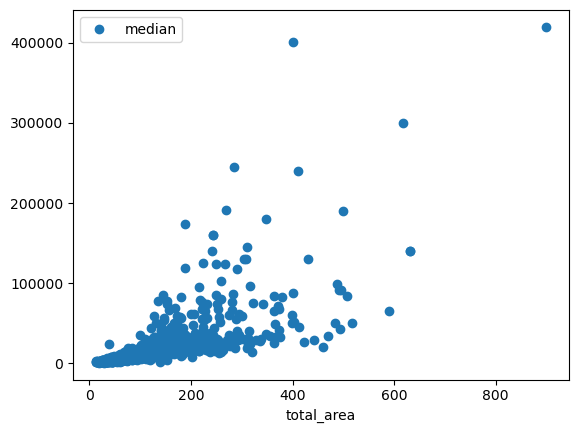

In [58]:
# Для анализа зависимости цены от общей площади, я строю сводную таблицу, указывая в подсчет функции среднюю, далее 
# столбец переименовываю в 'median' и строю график plot
pivot_table_total_area = estate.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median')
pivot_table_total_area.columns = ['median']
pivot_table_total_area.plot(y = 'median', style = 'o')

estate['total_area'].corr(estate['last_price'])

Согласно диаграмме рассеяния существуют связь между общей площадью квартиры и ее ценой, это также доказывает коэффициент корреляции Пирсона, равное 0.65, что означает среднюю корреляцию.

##### Зависимость от жилой площади

0.5560663876926089

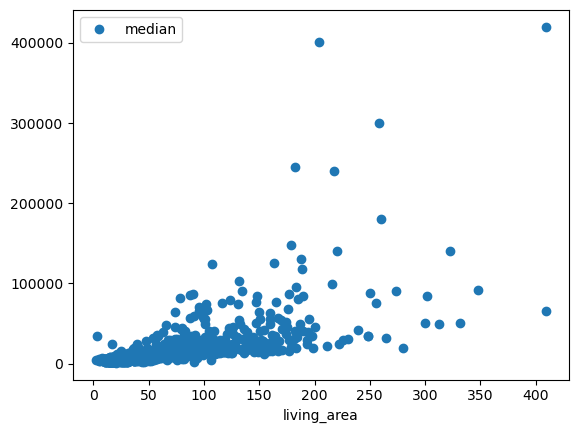

In [59]:
# Здесь провожу те же самые действия, что и с общей площадью.
pivot_table_living_area = estate.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'median')
pivot_table_living_area.columns = ['median']
pivot_table_living_area.plot(y = 'median', style = 'o')
estate['living_area'].corr(estate['last_price'])

График рассеяния показывает, что существуют связь между жилой площадью и ценой квартиры, чем больше жилая площадь, тем больше цена квартиры, однако коэффицент корреляции, равный 0,56, несколько ниже, то есть связь более слабая, чем при сравнении с общей площадью.

##### Зависимость от  площади кухни

0.45379964962666425

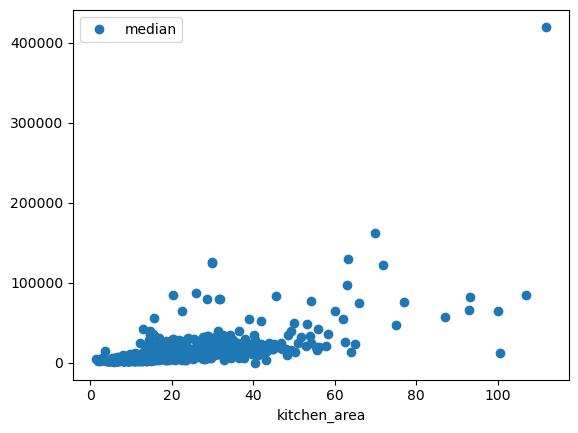

In [60]:
# Здесь провожу те же самые действия, что и с общей и жилой площадью.
pivot_table_kitchen_area = estate.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'median')
pivot_table_kitchen_area.columns = ['median']
pivot_table_kitchen_area.plot(y = 'median', style = 'o')
estate['kitchen_area'].corr(estate['last_price'])

Площадь кухни также влияет на цену квартиры, но связь слабая (коэффциент равен 0,45). Таким образом, больше всего на цену влияет именно общая площадь, потом жилая, и наименьшее влияние имеет площадь кухни.

##### Зависимость от количества комнат

0.3633428499648957

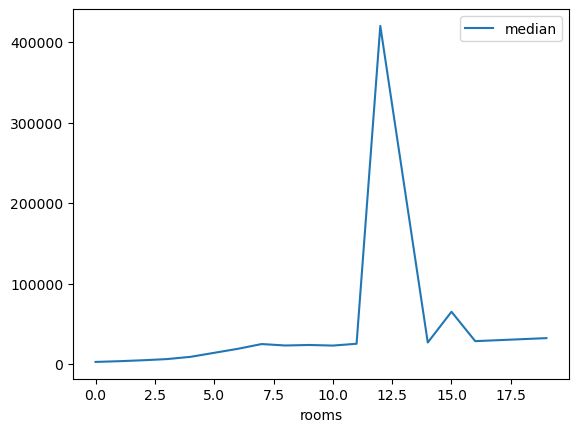

In [61]:
# Здесь провожу те же самые действия, но диаграмма имеет вид линии.
pivot_table_rooms_area = estate.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
pivot_table_rooms_area.columns = ['median']
pivot_table_rooms_area.plot(y = 'median')
estate['rooms'].corr(estate['last_price'])

Согласно графику, чем ближе число комнат к 12, тем выше стоимость цены, но в целом связь слабая (0,37).

##### Зависимость от этажа квартиры

,mean,count,median
floor_category,,,
другой,6674.074184,17363,4850.0
первый,4803.560230,2917,3900.0
последний,7361.024844,3336,4300.0


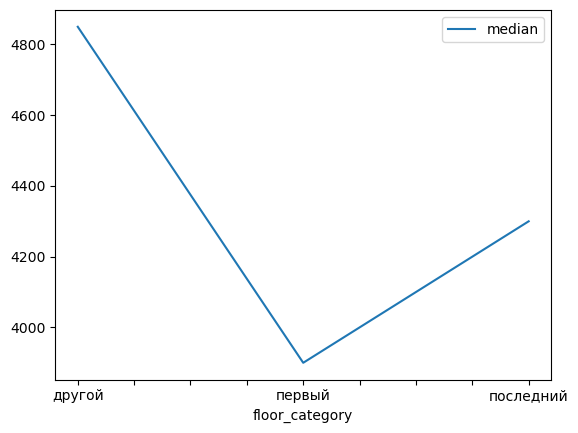

In [62]:
# Здесь провожу те же самые действия, но диаграмма имеет вид линии.
pivot_table_floor_category = estate.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median');
# Поскольку тип этажа категориальная переменная, нельзя посчитать коэффициент корреляции, поэтому для общего понимания связи я
# дополнительно вывожу среднее, медиану и число по сводной таблице
pivot_table_floor_category

В соответствие с приведенным анализом, цена квартиры следующим образом зависит от типа этажа: если этаж "другой", то цена выше, самая низкая цена у первого этажа, тогда как у последнего этажа средняя цена (то есть ниже, чем у "другого" и выше, чем у первого).

##### Зависимость от даты размещения

,mean,count,median
weekday_exposition,,,
1,6394.233422,4183,4730.0
2,6627.970431,3974,4700.0
0,6511.613424,3612,4650.0
3,6708.663232,4295,4650.0
4,6372.130604,4000,4585.0
5,6976.803943,1936,4555.0
6,6246.180298,1699,4550.0


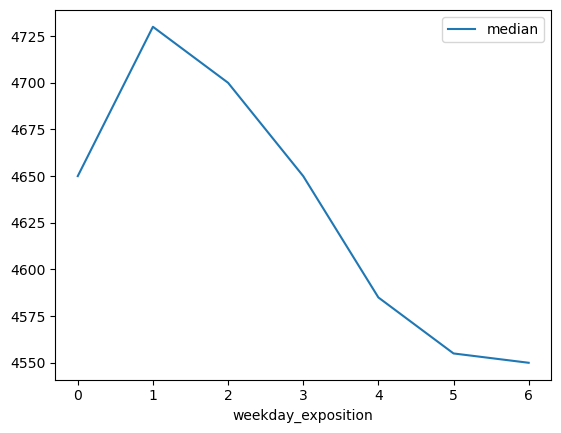

In [63]:
pivot_table_weekday_exposition = estate.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
# также сортирую по медиане для наглядности данные по сводной таблице.
pivot_table_weekday_exposition.sort_values('median', ascending = False)

При анализе связи цены и дня недели размещения объявления, наблюдается интересная зависимость: вторник и среду самая высокая цена у квартир (4730 и 4700), а со среды до воскресения цена падает (в воскресенье самая низкая цена- 4550), и с понедельника цена начинает расти, что, вероятно, связано, с тем, что люди наиболее активны во всех важных рабочих делах в начале недели. Таким образом, в начале недели более высокая цена обявлений и самая низкая цена в выходные.

,mean,count,median
month_exposition,,,
2014-11-01,13537.800200,20,13280.5600
2015-01-01,15426.370514,70,7425.0000
2014-12-01,11839.159145,117,7300.0000
2015-09-01,8736.927543,92,6210.7265
2015-03-01,7201.674158,114,5646.0100
2015-02-01,7923.008194,62,5570.0000
2015-08-01,11692.971500,94,5550.0000
2015-07-01,10255.176376,93,5400.0000
2019-05-01,7825.606246,61,5250.0000


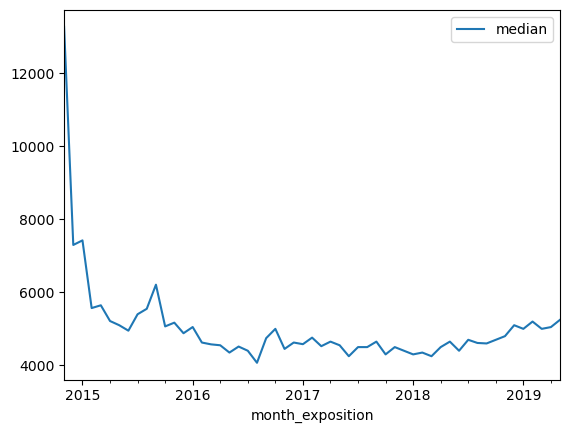

In [64]:
pivot_table_month_exposition = estate.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')
# также сортирую по медиане для наглядности данные по сводной таблице.
pivot_table_month_exposition.sort_values('median', ascending = False)

Самая высокая стоимость квартиры наблюдается в апреле, самая низкая в июне. Проследить какую-либо закономерность по сезонам достаточно сложно, т.к. значения скачат каждый месяц. 

                 total_area
year_exposition            
2014              86.249854
2015              71.558371
2016              62.156144
2017              60.759249
2018              57.677386
2019              59.467864


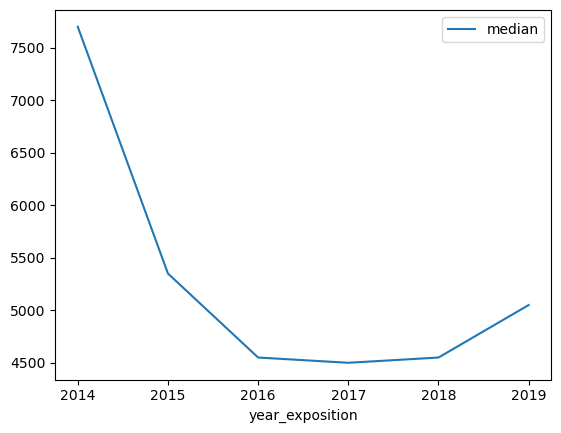

In [65]:
pivot_table_year_exposition = estate.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')
# также сортирую по медиане для наглядности данные по сводной таблице.
pivot_table_year_exposition.sort_values('median', ascending = False)
# посмотрим взаимосвязь общей площади и годов с помощью сводной таблицы для проверки гипотезы о том, что снижение цены 
#  связано со снижением площади квартиры
pivot_table_area = estate.pivot_table(index='year_exposition', values='total_area')
print(estate.pivot_table(index='year_exposition', values='total_area'))

Согласно построенному графику, самая высокая цена на квартиры была в 2014 году, затем она резко уменьшилась в 2015 году и снижалась до 2016 года и с 2017 года начала расти. Вместе с тем, на связь цены и года продажи квартир влияет третий фактор, а именно снижение средней общей площади недвижимости. Таким образом, уменьшение площади квартир привело к снижению цен на квартиры.

#### Анализ средней цены 1 кв.м в 10 населенных пунктах с наибольшим числом объявлениц

In [66]:
# я построила сводную таблицу по цене средней и названиям населенного пункта, вывела функции подсчета и среднего, далее 
# переименовала столбцы и отсортировала значения, вывела первые 10 значений.
locality_pivot_table = estate.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
print(locality_pivot_table)

                   count           mean
locality_name                          
Санкт-Петербург    15721  114848.565231
посёлок Мурино       522   85751.733716
посёлок Шушары       440   78676.904545
Всеволожск           398   68654.007538
Пушкин               369  103125.373984
Колпино              338   75424.150888
посёлок Парголово    327   90175.489297
Гатчина              307   68745.693811
деревня Кудрово      299   92473.086957
Выборг               237   58141.489451


Анализ средней цены одного кквадратного метра в 10 населенных пунктах, с самым большим количеством объявлений, показал, что в Санкт-Петербурге самая высокая цена, тогда как в Выборге - самая низкая средняя цена на квартиры.

#### Анализ средней цены километра в Санкт-Петербурге

                 meter_price
city_distance               
0.0            245833.111111
1.0            177004.963542
2.0            157848.564516
3.0            121386.991429
4.0            133282.422965
5.0            140509.339130
6.0            151011.750809
7.0            156176.445238
8.0            125671.030151
9.0            113130.595278
10.0           112727.066759
11.0           108630.402377
12.0           107488.274766
13.0           108147.690460
14.0           104251.944488
15.0           104231.531250
16.0           100542.168379
17.0            96597.212911
18.0            96361.839080
19.0            98652.305732
20.0           103044.775510
21.0            94469.136752
22.0            91329.965347
23.0            91828.070588
24.0            85736.461538
25.0            91531.038462
26.0            89285.415094
27.0           132115.000000
28.0            81161.571429
29.0            72952.666667


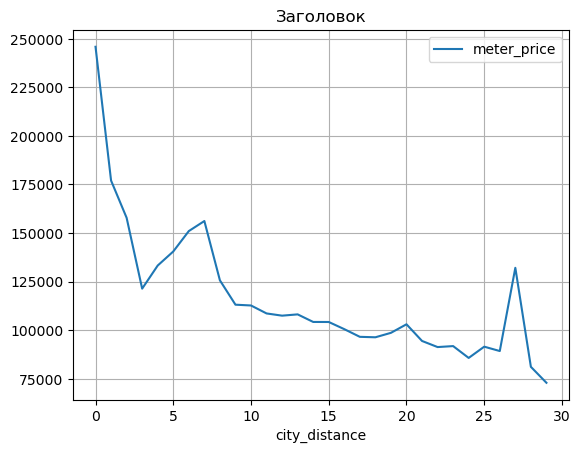

In [67]:
# я с помощью query делаю срез, выделяя недвижимость в Санкт-Петербурге, далее строю сводную таблицу по расстоняию до центра и 
# цене за кв.метр
pivot_table_distance = estate.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'city_distance', values = 'meter_price')
pivot_table_distance.plot(grid = True, title = 'Заголовок')
print(pivot_table_distance)


Анализ средней цены каждого километра показал, что существует зависимость стоимости объектов от расстояния до центра: чем дальше от центра квартира, тем меньше ее цена. Так, самые дорогие квартиры находятся в пределах 2 км от центра, также можно отметить возрастание цены при 8 и 27 км от центра. Начиная с 9 км наблюдается потепенное уменьшение цены квартир.

### Общий вывод по анализу объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах

Мы провели анализ данных объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах, в ходе которого мы обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы, а также добавили новые столбцы, необходимые для исследования. 
 Нами были выявлены ряд особенностей и зависимостей продаж.
 <br>
 
*Особенности*
 <br>

С 2014 по 2017 год наблюдалось снижение цен на квартиры. 
В Санкт-Петербурге была отмечена самая высокая средняя цена квартир, тогда как в Выборге - самая низкая.
Самые дорогие квартиры находятся в пределах 2 км от центра, что позволяет сделать вывод о том, что радиус в 2 км определяет центр города.
Самые дорогие квартиры находятся не на первом, не на последних этажах.
 <br>
 
*Зависимости*:
- **этаж и число продаваемых квартир**: чем выше этаж, тем меньше продается квартир, что, вероятно, связано, с тем, что в Санкт-Петербурге мало высотных домов и б’ольшая часть продаваемых объектов находятся на 4 и 5 этажах. 
- **общая площадь квартиры**: существуют связь между общей площадью квартиры и ее ценой (чем больше площадь, тем больше цена квартиры).
-  **продажи по дням недели и месяцам**: самые быстрые продажи происходили первые 50 дней, а самые долгие от 600 дней до 1580 дней.
- **день недели и месяц размещения объявления**: наблюдается интересная зависимость, согласно которой в начале недели более высокая цена объявлений (особенно во вторник) и самая низкая цена в выходные. Максимальная стоимость квартиры наблюдается в апреле, самая низкая в июне.
- **расстояние до центра**: б’ольшая часть квартир находится недалеко от центра примерно в 11-15 км. и наблюдается четкая зависимость цены квартиры от удаленности от центра: чем дальше от центра квартира, тем меньше ее цена. 
